In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
import math
from math import pi
np.set_printoptions(
    linewidth=120, formatter={
        'float': lambda x: f"{0:8.4g}" if abs(x) < 1e-10 else f"{x:8.4g}"})
np.random.seed(0)
from spatialmath import *
from spatialmath.base import *
from roboticstoolbox import *

FORWARD KINEMATICS FROM A POSE GRAPH

Representamos mediante una secuencia de transformacion elemental (ETS)


Rotacion elemental de un angulo variable

Traslacion elemental en el eje x de una distancia constante

In [2]:
a1 = 1
e = ET2.R() * ET2.tx(a1)

Numero de transformaciones: 1 variable, 1 constante

In [79]:
len(e)

2

q is articulacion (joint) variable

In [80]:
print(e)

R(q) ⊕ tx(1)


si q=pi/6 radianes, la matriz the transformation representa la pose del efector final

In [81]:
e.fkine(pi / 6)

   0.866    -0.5       0.866     
   0.5       0.866     0.5       
   0         0         1         


equivalencia con SE2 (grupo euclidiano especial en 2d), este objeto representa una transformacion rigida en 2d

In [82]:
SE2.Rot(pi / 6) * SE2.Tx(a1)

   0.866    -0.5       0.866     
   0.5       0.866     0.5       
   0         0         1         


Brazo robotico con 2  articulaciones q0 y q1

la interpretacion de la pose del efector final :


In [83]:
a1 = 1; a2 = 1
e = ET2.R() * ET2.tx(a1) * ET2.R() * ET2.tx(a2)
e

R(q0) ⊕ tx(1) ⊕ R(q1) ⊕ tx(1)


pose del efector final, evaluando la expresion para angulos especificos de las articulaciones en grados


In [84]:
e.fkine(np.deg2rad([30, 40])).printline()

t = 1.21, 1.44; 70°


equivalencia utilizando el objeto SE2

In [85]:
T = SE2.Rot(np.deg2rad(30)) * SE2.Tx(a1) * SE2.Rot(np.deg2rad(40)) * SE2.Tx(a2)
T.printline()

t = 1.21, 1.44; 70°


Numero de articulaciones (joints) segun el objeto ETS2

In [86]:
e.n

2

Transformaciones elementales en la secuencia de las articulaciones

In [87]:
e.joints()

[R(q0), R(q1)]

Tipo de articulacion en la cadena cinematica, en este caso dos articulaciones del tipo rotacional ambas

In [88]:
e.structure

'RR'

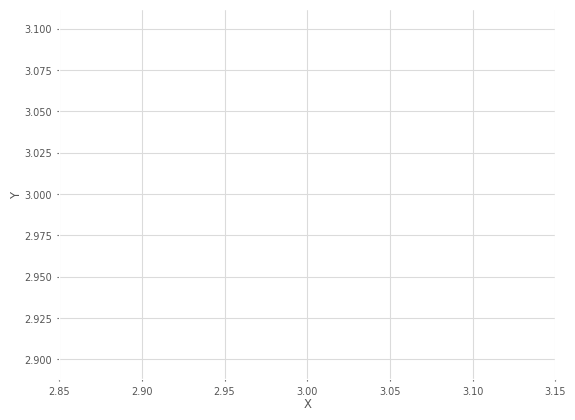

<Figure size 640x480 with 0 Axes>

In [89]:
e.plot((np.deg2rad([30, 40])), limits=[3,3,3,3])
plt.show()

el objeto ETS2 puede entrega una lista de sus componentes

In [100]:
e[0]



R(q0)

metodos de un objeto ET2

constante de la transformacion, en este caso a2

In [105]:
e[3].eta

1.0

matriz SE2, que representa la traslacion de 1 en la direccion x

In [108]:
e[3].A()

array([[       1,        0,        1],
       [       0,        1,        0],
       [       0,        0,        1]])